# *Mobile Price Classification*
# https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification

## Условие задачи


Боб основал собственную мобильную компанию. Он хочет дать жесткий отпор таким крупным компаниям, как Apple, Samsung и т.д. Он не знает, как оценить стоимость мобильных телефонов, которые создает его компания. На этом конкурентном рынке мобильных телефонов вы не можете просто предполагать что-то. Чтобы решить эту проблему, он собирает данные о продажах мобильных телефонов различных компаний. Боб хочет выяснить некоторую взаимосвязь между характеристиками мобильного телефона (например, оперативной памятью, встроенной памятью и т.д.) и его продажной ценой. Но он не так хорош в машинном обучении. Поэтому ему нужна ваша помощь, чтобы решить эту проблему. В этой задаче вам нужно предсказать не фактическую цену, а диапазон цен, указывающий, насколько высока цена.

battery_power - Общая энергия, которую батарея может накопить за один раз, измеряется в мАч

blue - Есть Bluetooth или нет

clock_speed - скорость, с которой микропроцессор выполняет команды

dual_sim - Поддерживает две sim-карты или нет

fc - Мегапиксели фронтальной камеры

four_g - Есть 4G или нет

int_memory - Внутренняя память в гигабайтах

m_dep - толщина в см

mobile_wt - вес 

n_cores - количество ядер

pc - Основная камера в мегапикселях

px_height - Высота разрешения в пикселях

px_width - Ширина разрешения в пикселях

ram - Оперативная память в мегабайтах

sc_h - Высота экрана мобильного устройства в см

sc_w - Ширина экрана мобильного устройства в см

talk_time - самое длительное время, на которое хватит одного заряда аккумулятора

three_g - наличие 3G

touch_screen - есть touch_screen

wifi - наличие wifi

price_range - Это целевая переменная со значением 0(низкая стоимость), 1 (средняя стоимость), 2 (высокая стоимость) и 3 (очень высокая стоимость).

## Импорт библиотек

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
pd.set_option('display.max_columns', None)

## Чтение данных

In [3]:
data = pd.read_csv('C:/Users/Арина/Desktop/ЗАДАНИЯ/Финальные проекты-20231120/2_Mobile Price Classification.csv')
data

,Unnamed: 0,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,842 mAh,no,2.2,no,1,no,7 Gb,0.6,188,2,2,20,756,2549,9,7,19,no,no,yes,1
1,1,1021 mAh,yes,0.5,yes,0,yes,53 Gb,0.7,136,3,6,905,1988,2631,17,3,7,no,yes,no,2
2,2,563 mAh,yes,0.5,yes,2,yes,41 Gb,0.9,145,5,6,1263,1716,2603,11,2,9,no,yes,no,2
3,3,615 mAh,yes,2.5,no,0,no,10 Gb,0.8,131,6,9,1216,1786,2769,16,8,11,no,no,no,2
4,4,1821 mAh,yes,1.2,no,13,yes,44 Gb,0.6,141,2,14,1208,1212,1411,8,2,15,no,yes,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,794 mAh,yes,0.5,yes,0,yes,2 Gb,0.8,106,6,14,1222,1890,668,13,4,19,no,yes,no,0
1996,1996,1965 mAh,yes,2.6,yes,0,no,39 Gb,0.2,187,4,3,915,1965,2032,11,10,16,no,yes,yes,2
1997,1997,1911 mAh,no,0.9,yes,1,yes,36 Gb,0.7,108,8,3,868,1632,3057,9,1,5,no,yes,no,3
1998,1998,1512 mAh,no,0.9,no,4,yes,46 Gb,0.1,145,5,5,336,670,869,18,10,19,no,yes,yes,0


## Обзор датасета

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     2000 non-null   int64  
 1   battery_power  2000 non-null   object 
 2   blue           2000 non-null   object 
 3   clock_speed    2000 non-null   float64
 4   dual_sim       2000 non-null   object 
 5   fc             2000 non-null   int64  
 6   four_g         2000 non-null   object 
 7   int_memory     2000 non-null   object 
 8   m_dep          2000 non-null   float64
 9   mobile_wt      2000 non-null   int64  
 10  n_cores        2000 non-null   int64  
 11  pc             2000 non-null   int64  
 12  px_height      2000 non-null   int64  
 13  px_width       2000 non-null   int64  
 14  ram            2000 non-null   int64  
 15  sc_h           2000 non-null   int64  
 16  sc_w           2000 non-null   int64  
 17  talk_time      2000 non-null   int64  
 18  three_g 

Датасет содержит информацию о 2000 мобильных телефонах.

В таблице данных 22 столбца, первый из которых ('Unnamed: 0') являетсяя копией индекса. Его необходимо просто удалить, поскольку никакой практической информации он не несет.

Целевая переменная содержится в столбце 'price_range' (диапазон цен).
Соответственно, 20 других переменных являются независимыми, по их значениям мы будем определять класс цен.

Пропущенных данных нет: все столбцы содержат 2000 non-null значений. 

В датасете 8 столбцов имеют текстовый формат. Для проведения анализа необходимо привести эти данные к числовому виду. Для этого:
- столбцы 'battery_power' и 'int_memory' очистим от текстовой составляющей в виде единицы измерения;
- столбцы 'blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen' и 'wifi' приведем к булевому виду путем замены yes/no на 1/0.

## Очистка данных

Удаляем столбец - дуббль индекса

In [5]:
data = data.drop(['Unnamed: 0'], axis=1)

Делаем булевые переменные в столбцах, содержащих yes/no

In [6]:
data = data.replace(['yes', 'no'], [1, 0])

Работаем со столбцами 'battery_power' и 'int_memory'

In [7]:
def clean_power(string):
    string = pd.to_numeric(string.replace(' mAh', ''))
    return string

data['battery_power'] = data['battery_power'].apply(clean_power)

In [8]:
def clean_memory(string):
    string = pd.to_numeric(string.replace(' Gb', ''))
    return string

data['int_memory'] = data['int_memory'].apply(clean_memory)

Проверяем

In [9]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,0,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,0,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,0,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,0,1,0,1


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Таким образом, мы полностью избавились от текстовых столбцов

Теперь по всем столбцам посмотрим уникальные значения

In [11]:
for col in data.columns:
    print(col, data[col].unique())

battery_power [ 842 1021  563 ... 1139 1467  858]
blue [0 1]
clock_speed [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
dual_sim [0 1]
fc [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
four_g [0 1]
int_memory [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]
m_dep [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
mobile_wt [188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 135 153
  89  82 130 189 181  99 184 195 108 133 179 147 137 190 176  84  97 124
 183 113  92  95 151 117  94 173 105 115  91 112 123 129 154 191 175  86
  98 125 126 158 170 161 19

В столбце 'three_g' содержится только одно уникально значение. Следовательно, наличие в мобильном телефоне функции 3G никак не влияет на классификацию телефона. Значит, этот столбец можно удалить.

In [12]:
data = data.drop(['three_g'], axis=1)

Проверим статистические показатели переменных. Будем обращать внимание на минимальные и максимальные значения, а также на соотношение между средним значением и медианой по каждой переменной.

In [13]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,3.000000


На что обращаем внимание:

1. fc и pc - характеристики фронтальной и основной камеры соответственно - имеют минимальные значения 0, что мы интерпретируем как отсутствие у мобильного телефона камеры. Фронтальная камера отсутсвует у 474 телефонов в выборке, обе камеры - у 101 телефона. Эти безкамерные мобильные телефоны встречаются во всех четырех ценовых классах. Поэтому будем считать, что это допустимый вариант модификации телефона.

2. Как следствие предудущего пункта, у показателя fc медианное значение сильно отличается от среднего.

3. px_height - высота разрешения в пикселях - также есть 0. С технической точки зрения такого не может быть, т.е. это ошибка внесения данных.
В датасете всего две строки, в которых px_height = 0. Мы можем исправить эту ошибку, заменив 0 на значение, которое лучшим образом будет согласовываться с шириной разрешения экрана (px_width).
Вообще, для реальных телефонов "каноническое" минимальное разрешение экрана 240х320. Но в нашей выборке телефонов с высотой экрана меньше 320 пикселей  568 строк, так что для нашей "кукольной" ситуации не будем углубляться в это.

4. Как следствие предудущего пункта, видим разницу между медианой и средним в px_height. Проверим этот показатель после исправления нулевых данных.

5. sc_w - ширина экрана мобильного устройства в см - тоже встречается нулевое значение. Это явная ошибка внесения данных. Таких строк 180, необходимо их обработать.

Проверяем строки мобильных телефонов без камер

In [14]:
data[(data['pc'] == 0) & (data['fc'] == 0)]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,touch_screen,wifi,price_range
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,0
33,1310,1,2.2,1,0,1,51,0.6,100,4,0,178,1919,3845,7,0,12,1,0,3
52,1654,1,1.5,1,0,1,43,0.3,109,2,0,546,629,3112,12,5,10,1,0,3
54,1073,1,0.5,1,0,0,51,0.5,145,7,0,690,804,2908,6,0,18,1,0,2
62,1156,1,1.2,1,0,1,50,0.8,159,2,0,322,547,470,7,0,15,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1906,1807,0,0.8,1,0,1,38,0.2,97,8,0,1332,1814,1069,7,6,7,0,0,1
1911,1259,0,1.2,1,0,0,13,0.5,97,2,0,1210,1989,340,17,13,4,0,1,0
1931,1854,0,0.9,1,0,1,33,0.4,195,1,0,665,718,1675,14,12,9,0,1,1
1968,1667,0,1.0,1,0,1,21,0.9,138,2,0,1211,1396,635,17,7,15,0,0,0


Будем считать, что это допустимый вариант модификации телефона.

Проверяем нулевые значения высоты разрешения в пикселях

In [15]:
data[data['px_height'] == 0]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,touch_screen,wifi,price_range
1481,1834,0,2.1,0,7,1,40,0.1,99,4,11,0,1987,3692,13,0,16,1,0,3
1933,897,1,2.0,0,3,1,2,0.6,154,8,10,0,994,1958,7,5,7,1,0,1


Посмотрим, какие варианты есть при px_width равном 1987 и 994

In [16]:
data[(data['px_width'] == 1987) | (data['px_width'] == 994)]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,touch_screen,wifi,price_range
324,1698,0,2.1,0,5,1,18,0.9,160,6,20,363,994,796,13,3,14,0,1,0
588,1966,1,1.4,1,2,0,40,0.9,185,8,18,1197,1987,1185,11,2,20,1,0,2
1481,1834,0,2.1,0,7,1,40,0.1,99,4,11,0,1987,3692,13,0,16,1,0,3
1933,897,1,2.0,0,3,1,2,0.6,154,8,10,0,994,1958,7,5,7,1,0,1


В строках 1481 и 1933 меняем значение в столбце px_height с 0 на 1197 и 363 соответственно

In [17]:
data.loc[1481, 'px_height'] = 1197
data.loc[1933, 'px_height'] = 363

Проверяем

In [18]:
data[(data['px_width'] == 1987) | (data['px_width'] == 994)]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,touch_screen,wifi,price_range
324,1698,0,2.1,0,5,1,18,0.9,160,6,20,363,994,796,13,3,14,0,1,0
588,1966,1,1.4,1,2,0,40,0.9,185,8,18,1197,1987,1185,11,2,20,1,0,2
1481,1834,0,2.1,0,7,1,40,0.1,99,4,11,1197,1987,3692,13,0,16,1,0,3
1933,897,1,2.0,0,3,1,2,0.6,154,8,10,363,994,1958,7,5,7,1,0,1


Проверяем нулевые значения ширины экрана в см

In [19]:
data[data['sc_w'] == 0]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,touch_screen,wifi,price_range
12,1815,0,2.8,0,2,0,33,0.6,159,4,17,607,748,1482,18,0,2,0,0,1
24,503,0,1.2,1,5,1,8,0.4,111,3,13,201,1245,2583,11,0,12,0,0,1
33,1310,1,2.2,1,0,1,51,0.6,100,4,0,178,1919,3845,7,0,12,1,0,3
42,1253,1,0.5,1,5,1,5,0.2,152,2,19,685,714,1878,15,0,4,1,0,1
50,1547,1,3.0,1,2,1,14,0.7,198,3,19,1042,1832,2059,5,0,15,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,772,0,1.0,1,0,1,23,0.6,97,7,11,317,1805,2782,7,0,17,0,0,2
1920,591,1,0.5,1,1,1,16,0.9,90,6,17,892,1603,3746,5,0,5,1,0,3
1946,590,1,1.2,1,0,0,32,0.4,141,6,1,227,509,1817,10,0,6,1,0,0
1954,686,1,2.7,1,0,0,36,0.1,194,4,1,64,745,1503,10,0,13,0,0,0


Нулевые значения ширины экрана в см присутствуют в 180 строках. Заменить значения как в предыдущем случае довольно трудно, поскольку из-за того, что данные не совсем реальные, трудно вывести закономерность соотношения длины-высоты и поставить вместо нуля какое-либо значение, осонованное на показателе высоты экрана.

In [20]:
data.groupby('sc_w')['sc_h'].unique()

sc_w
0     [18, 11, 7, 15, 5, 6, 16, 12, 17, 19, 10, 8, 9...
1     [17, 7, 11, 16, 10, 5, 12, 6, 18, 9, 19, 13, 1...
2     [11, 8, 5, 10, 18, 14, 9, 6, 12, 13, 15, 7, 19...
3     [17, 16, 9, 8, 15, 10, 13, 19, 14, 5, 12, 11, ...
4     [10, 9, 14, 5, 19, 11, 16, 8, 15, 6, 18, 17, 1...
5     [11, 18, 6, 10, 12, 7, 9, 13, 15, 14, 19, 17, ...
6     [15, 9, 12, 13, 7, 19, 14, 11, 17, 8, 10, 16, 18]
7        [9, 8, 12, 13, 14, 10, 11, 18, 16, 17, 15, 19]
8           [16, 13, 17, 18, 12, 14, 11, 9, 19, 10, 15]
9              [14, 10, 18, 15, 12, 13, 17, 11, 19, 16]
10                 [19, 18, 16, 14, 12, 13, 11, 17, 15]
11                     [17, 14, 16, 13, 18, 12, 19, 15]
12                         [18, 15, 16, 19, 14, 13, 17]
13                             [19, 16, 15, 17, 18, 14]
14                                 [17, 19, 16, 18, 15]
15                                     [17, 19, 18, 16]
16                                         [17, 19, 18]
17                                         

<Axes: xlabel='sc_w', ylabel='sc_h'>

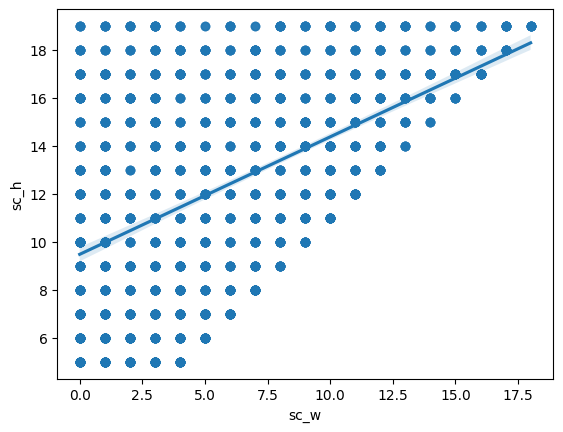

In [21]:
sns.regplot(data = data, x = 'sc_w', y = 'sc_h')

Это распределение хорошо видно на графике: при sc_w меньшем 4 каждому значению ширины экрана соответсвует каждое значение высоты.

Однако видно, что есть некоторая линейная зависимость между этими показателями. На основании этого принимаем решение не пытаться заменить нулевые значения в стобце sc_w или удалить их, а удалить этот столбец целиком.

In [22]:
data = data.drop(['sc_w'], axis=1)

In [23]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,talk_time,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.88800,1251.515500,2124.213000,12.306500,11.011000,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.52746,432.199447,1084.732044,4.213245,5.463955,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,1.00000,500.000000,256.000000,5.000000,2.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,284.00000,874.750000,1207.500000,9.000000,6.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,565.50000,1247.000000,2146.500000,12.000000,11.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,948.00000,1633.000000,3064.500000,16.000000,16.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.00000,1998.000000,3998.000000,19.000000,20.000000,1.000000,1.000000,3.000000


**Таким образом завершили очистку данных.**

## Анализ данных

In [24]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,talk_time,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,19,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,7,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,9,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,11,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,15,1,0,1


Смотрим соотношение значений целевой переменной

In [25]:
data['price_range'].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

**Выборка полностью сбалансирована.**

Следовательно, при обучении модели нам не нужно задавать веса классов.

Оценим связь между переменными с помощью матрицы корреляции и тепловой карты.
Это поможет нам понять какие из переменных показывают наибольшую связь со значением целевой переменной, а также увидеть есть ли сильная взаимозависимость между какими-либо переменными, которая может оказать существенное влияние на результаты анализа. 

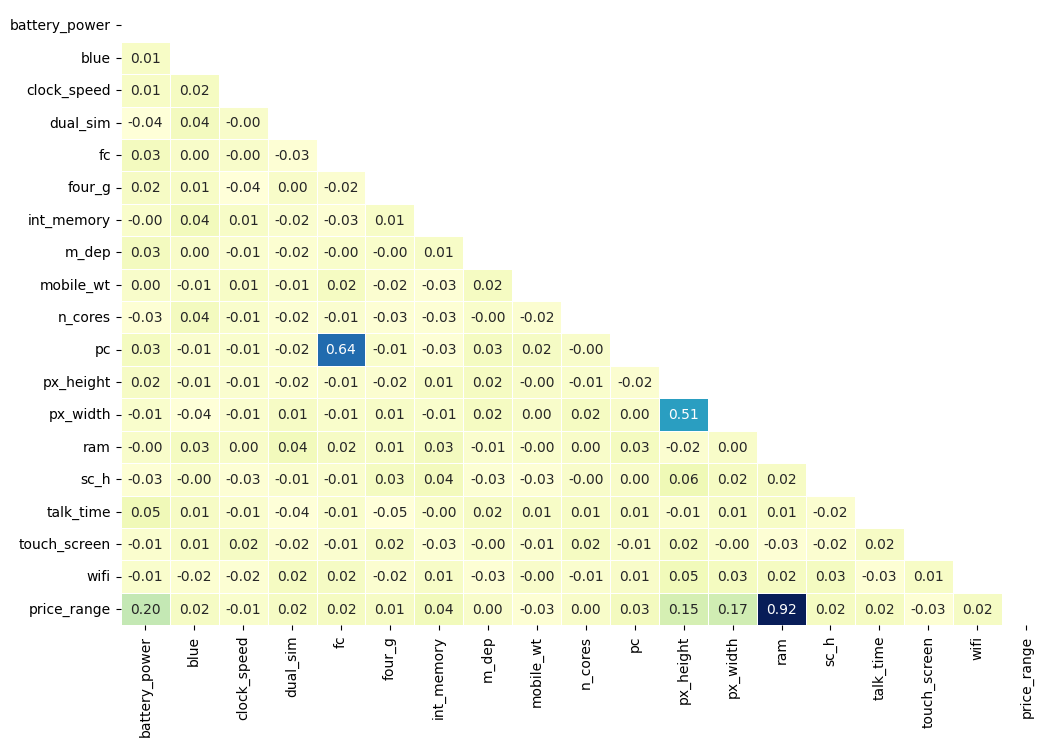

In [26]:
corr_matrix = data.corr()
matrix = np.triu(corr_matrix)
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths = 0.5,
                 fmt = ".2f",
                 cmap = "YlGnBu",
                 cbar = False,
                 mask = matrix)

Исходя из полученных данных, можно сделать вывод, что цена мобильного телефона (вернее ее диапазон) в большей степени определяется объемом оперативной память в мегабайтах - коэффициент корреляции между результирующим показателем price_range и ram близок к единице и составляет 0.92.

Также мы видим довольно высокую корреляцию между разрешением матрицы фронтальной и основной камер (коэффициент корреляции 0.64) и между показателями разрешения экрана в пикселях (коэффициент 0.51).
Для специфики стоящей перед нами задачи это не играет большой роли.

К сожалению, матрица корреляции не даст нам адекватную картину относительно взаимосвязи переменных в случаях, когда эта зависимость нелинейная. В этих случаях коэффициент будет близок к нулю, хотя связь может быть сильной.

### Используем методы машинного обучения для решения задачи классификации

### Метод 1 - Дерево решений

Разбиваем датасет на обучающую и тестовую выборки

In [27]:
X = data.drop('price_range', axis=1)
Y = data['price_range']

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    random_state = 45,
                                                    test_size = 0.3)

Задаем параметры модели и обучаем ее

In [29]:
model_tree = DecisionTreeClassifier(random_state = 45, 
                                    criterion = 'entropy', 
                                    max_depth = 8, 
                                    min_samples_split = 3,
                                    min_samples_leaf = 9, 
                                    class_weight = None)

Т.к. побор параметров модели вручную может занять много времени, используем GridSearchCV для автоматического подбора параметров для нашей модели.

Будем осуществлять подбор следующих параметров:
- глубина дерева (от 4 до 20);
- минимальное число образцов в листах (от 3 до 10)
- минимальное число образцов для сплита (от 3 до 10).

In [50]:
model_tree_parametrs = {'max_depth': range(4,20),
                        'min_samples_leaf': range (3,10),
                        'min_samples_split': range (3,10)}

In [51]:
model_tree_grid = GridSearchCV(model_tree, model_tree_parametrs)

In [52]:
model_tree_grid.fit(X_train, Y_train)

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=8,
                                              min_samples_leaf=9,
                                              min_samples_split=3,
                                              random_state=45),
             param_grid={'max_depth': range(4, 20),
                         'min_samples_leaf': range(3, 10),
                         'min_samples_split': range(3, 10)})

Получаем результат

In [53]:
model_tree_grid.best_params_

{'max_depth': 8, 'min_samples_leaf': 9, 'min_samples_split': 3}

Подставляем данные значения в нашу модель

Также опытным путем выяснили, что использование энтропийного критерия вместо критерия Джини дает лучший результат.

Обучаем модель.

In [30]:
model_tree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=9,
                       min_samples_split=3, random_state=45)

Получаем результат работы модели на обучающей выборке

In [31]:
Y_model = model_tree.predict(X_train)

print(classification_report(Y_train, Y_model, labels = model_tree.classes_))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       350
           1       0.92      0.84      0.88       336
           2       0.87      0.87      0.87       334
           3       0.93      0.97      0.95       380

    accuracy                           0.91      1400
   macro avg       0.91      0.91      0.91      1400
weighted avg       0.91      0.91      0.91      1400



Получаем результат работы модели на тестовой выборке

In [32]:
Y_predict = model_tree.predict(X_test)

print(classification_report(Y_test, Y_predict, labels = model_tree.classes_))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       150
           1       0.85      0.78      0.81       164
           2       0.79      0.78      0.78       166
           3       0.81      0.91      0.86       120

    accuracy                           0.84       600
   macro avg       0.84      0.85      0.84       600
weighted avg       0.84      0.84      0.84       600



**Точность прогнозирования (или доля правильных ответов) на обучающей выборке составляет 91%, на тестовой - 84%.**

**Потерю качества на 7% считаем удовлетворительной.**

Рассмотрим вклад каждой переменной в получившуюся модель.  
Возможно нам удастся улучшить модель путем корректировки числа входящих в нее переменных.

In [33]:
pd.DataFrame({'column': model_tree.feature_names_in_,
             'importance': model_tree.feature_importances_})

,column,importance
0,battery_power,0.100268
1,blue,0.000000
2,clock_speed,0.000952
3,dual_sim,0.000000
4,fc,0.005257
5,four_g,0.000000
6,int_memory,0.000000
7,m_dep,0.000000
8,mobile_wt,0.003282
9,n_cores,0.000000


Как видно из полученных данных, ценовой диапазон мобильных телефонов на 74% определяется объемом оперативной памяти в мегабайтах (ram).


На работу модели никак не влияют следующие переменные:
- наличие Bluetooth (blue);
- поддержка двух sim-карт (dual_sim);
- наличие 4G (four_g);
- объем внутренней памяти (int_memory);
- толщина телефона (m_dep);
- количество ядер (n_cores);
- качество основной камеры (pc);
- максимальное время разговора на одном заряде аккумулятора (talk_time);
- наличие WiFi (wifi)

Маленькое значение важности имеет также скорость, с которой микропроцессор выполняет команды (clock_speed) - менее 0.001

Создадим модель без этих данных.

In [34]:
X_new = data.drop(['price_range', 'blue', 'dual_sim', 'four_g', 'int_memory', 'm_dep', 'n_cores', 'pc', 'talk_time', 'wifi', 'clock_speed'], axis=1)

In [35]:
X_train_new, X_test_new = train_test_split(X_new,
                                           random_state = 45,
                                           test_size = 0.3)

In [36]:
model_tree.fit(X_train_new, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=9,
                       min_samples_split=3, random_state=45)

In [37]:
Y_model = model_tree.predict(X_train_new)

print(classification_report(Y_train, Y_model, labels = model_tree.classes_))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       350
           1       0.92      0.84      0.88       336
           2       0.87      0.87      0.87       334
           3       0.93      0.97      0.95       380

    accuracy                           0.91      1400
   macro avg       0.91      0.91      0.91      1400
weighted avg       0.91      0.91      0.91      1400



In [38]:
Y_predict = model_tree.predict(X_test_new)

print(classification_report(Y_test, Y_predict, labels = model_tree.classes_))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       150
           1       0.85      0.78      0.81       164
           2       0.79      0.78      0.78       166
           3       0.81      0.91      0.86       120

    accuracy                           0.84       600
   macro avg       0.84      0.85      0.84       600
weighted avg       0.84      0.84      0.84       600



**Качество прогнозирования не изменилось. Значит, при недостатке данных можно использовать "облегченную" модель**

In [39]:
pd.DataFrame({'column': model_tree.feature_names_in_,
             'importance': model_tree.feature_importances_})

,column,importance
0,battery_power,0.100282
1,fc,0.005258
2,mobile_wt,0.002365
3,px_height,0.065298
4,px_width,0.079241
5,ram,0.740704
6,sc_h,0.004611
7,touch_screen,0.002241


### Метод 2 - Рандомный лес

Используем изначальное разделение на обучающую и тестовую выборки

Задаем параметры модели

In [40]:
model_forest = RandomForestClassifier(n_estimators = 190, 
                              criterion = 'entropy', 
                              max_depth = 6, 
                              min_samples_split = 3, 
                              min_samples_leaf = 3, 
                              max_features = 'sqrt', 
                              bootstrap = True, 
                              max_samples = 50,
                              random_state = 45,
                              verbose = 0,
                              class_weight = None)

Используем GridSearchCV для автоматического подбора:
- числа деревьев в лесу (от 10 до 200 с шагом 10);
- максимальной глубины каждого дерева (от 4 до 15);
- минимального числа образцов в листах (от 3 до 10)
- минимального числа образцов для сплита (от 3 до 10).

In [64]:
model_forest_parametrs = {'n_estimators': range (10, 201, 10),
                         'max_depth': range (4, 15),
                          'min_samples_leaf': range (3,10),
                          'min_samples_split': range (3,10)}

In [65]:
model_forest_grid = GridSearchCV(model_forest, model_forest_parametrs)

In [66]:
model_forest_grid.fit(X_train, Y_train)

GridSearchCV(estimator=RandomForestClassifier(criterion='entropy', max_depth=9,
                                              max_samples=50,
                                              min_samples_leaf=8,
                                              min_samples_split=3,
                                              n_estimators=120,
                                              random_state=45),
             param_grid={'max_depth': range(4, 15),
                         'min_samples_leaf': range(3, 10),
                         'min_samples_split': range(3, 10),
                         'n_estimators': range(10, 201, 10)})

Получаем результат

In [67]:
model_forest_grid.best_params_

{'max_depth': 6,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 190}

Подставляем данные значения в нашу модель и обучаем ее

In [41]:
model_forest.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, max_samples=50,
                       min_samples_leaf=3, min_samples_split=3,
                       n_estimators=190, random_state=45)

Получаем результат работы модели на обучающей выборке

In [42]:
Y_model = model_forest.predict(X_train)

print(classification_report(Y_train, Y_model, labels = model_forest.classes_))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       350
           1       0.79      0.71      0.75       336
           2       0.80      0.71      0.75       334
           3       0.88      0.98      0.93       380

    accuracy                           0.84      1400
   macro avg       0.84      0.84      0.84      1400
weighted avg       0.84      0.84      0.84      1400



Получаем результат работы модели на тестовой выборке

In [43]:
Y_predict = model_forest.predict(X_test)

print(classification_report(Y_test, Y_predict, labels = model_forest.classes_))

              precision    recall  f1-score   support

           0       0.85      0.97      0.90       150
           1       0.80      0.64      0.71       164
           2       0.75      0.65      0.70       166
           3       0.76      0.97      0.86       120

    accuracy                           0.79       600
   macro avg       0.79      0.81      0.79       600
weighted avg       0.79      0.79      0.78       600



**Модель рандомного леса дала худший прогноз по сравнению с деревом решений: точность прогноза упала с 84% до 79%.**

При этом при расчете модели были использованы все 18 переменных.

In [44]:
pd.DataFrame({'column': model_forest.feature_names_in_,
             'importance': model_forest.feature_importances_})

,column,importance
0,battery_power,0.070006
1,blue,0.011618
2,clock_speed,0.037054
3,dual_sim,0.013285
4,fc,0.030496
5,four_g,0.011754
6,int_memory,0.044907
7,m_dep,0.034595
8,mobile_wt,0.044603
9,n_cores,0.035336


### Метод 3 - XGBoost

Используем изначальное разделение на обучающую и тестовую выборки

Задаем параметры модели без использования GridSearchCV

In [57]:
model_boost = GradientBoostingClassifier(n_estimators = 150, 
                              max_depth = 6, 
                              min_samples_split = 3,
                              min_samples_leaf = 3,
                              max_features = 'sqrt',
                              learning_rate = 0.01,
                              random_state = 45,
                              verbose = 0)

In [58]:
model_boost.fit(X_train, Y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=6, max_features='sqrt',
                           min_samples_leaf=3, min_samples_split=3,
                           n_estimators=150, random_state=45)

Получаем результат работы модели на обучающей выборке

In [59]:
Y_model = model_boost.predict(X_train)

print(classification_report(Y_train, Y_model, labels = model_boost.classes_))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       350
           1       0.98      0.97      0.98       336
           2       0.98      0.99      0.98       334
           3       1.00      1.00      1.00       380

    accuracy                           0.99      1400
   macro avg       0.99      0.99      0.99      1400
weighted avg       0.99      0.99      0.99      1400



Получаем результат работы модели на тестовой выборке

In [60]:
Y_predict = model_boost.predict(X_test)

print(classification_report(Y_test, Y_predict, labels = model_boost.classes_))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       150
           1       0.79      0.80      0.80       164
           2       0.80      0.77      0.78       166
           3       0.87      0.93      0.90       120

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600



**Точность предсказания моделью XGBoost на обучающей выборке составила 99%, на тестовой - 85%**

In [61]:
pd.DataFrame({'column': model_boost.feature_names_in_,
             'importance': model_boost.feature_importances_})

,column,importance
0,battery_power,0.070117
1,blue,0.001955
2,clock_speed,0.010795
3,dual_sim,0.002068
4,fc,0.012028
5,four_g,0.001880
6,int_memory,0.018893
7,m_dep,0.010376
8,mobile_wt,0.020972
9,n_cores,0.010135


Таким образом, градиентный бустинг, который сглаживает ошибки при построении модели, дал такой же результат как и обычное дерево решений, считающееся слабой моделью.

### Метод 4 - Метод опорных векторов

Используем изначальное разделение на обучающую и тестовую выборки

Задаем параметры модели и обучаем ее

In [50]:
model_svc = SVC(kernel = 'linear')
model_svc.fit(X_train, Y_train)

SVC(kernel='linear')

Получаем результат работы модели на обучающей выборке

In [51]:
Y_model = model_svc.predict(X_train)

print(classification_report(Y_train, Y_model, labels = model_svc.classes_))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       350
           1       0.99      0.99      0.99       336
           2       0.98      0.98      0.98       334
           3       0.99      0.99      0.99       380

    accuracy                           0.99      1400
   macro avg       0.99      0.99      0.99      1400
weighted avg       0.99      0.99      0.99      1400



Получаем результат работы модели на тестовой выборке

In [52]:
Y_predict = model_svc.predict(X_test)

print(classification_report(Y_test, Y_predict, labels = model_svc.classes_))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       150
           1       0.98      0.98      0.98       164
           2       0.96      0.97      0.96       166
           3       0.99      0.97      0.98       120

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600



**Точность прогнозирования на тестовой выборке составила 98%**

### Метод 5 - k-ближайших соседей

Используем изначальное разделение на обучающую и тестовую выборки

Задаем параметры модели и обучаем ее.

Количество соседей определили путем перебора различных вариантов в диапазоне от 3 до 30. С 20 получили наилучший результат.

In [53]:
model_knn = KNeighborsClassifier(n_neighbors = 20)
model_knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=20)

Получаем результат работы модели на обучающей выборке

In [54]:
Y_model = model_knn.predict(X_train)

print(classification_report(Y_train, Y_model, labels = model_knn.classes_))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       350
           1       0.93      0.92      0.93       336
           2       0.92      0.92      0.92       334
           3       0.97      0.95      0.96       380

    accuracy                           0.94      1400
   macro avg       0.94      0.94      0.94      1400
weighted avg       0.95      0.94      0.94      1400



Получаем результат работы модели на тестовой выборке

In [55]:
Y_predict = model_knn.predict(X_test)

print(classification_report(Y_test, Y_predict, labels = model_knn.classes_))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       150
           1       0.94      0.93      0.94       164
           2       0.91      0.92      0.91       166
           3       0.95      0.91      0.93       120

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600



**Точность составила 94% как на обучающей, так и на тестовой выборке**

## Вывод

В таблице отобразили точность предсказания результата каждой из использованных моделей машинного обучения

In [62]:
visual = pd.DataFrame({'model': ['Decision Tree', 'Random Forest', 'XGBoost', 'SVC', 'KNN'],
                       'accuracy': [0.84, 0.79, 0.85, 0.98, 0.94]})
visual

,model,accuracy
0,Decision Tree,0.84
1,Random Forest,0.79
2,XGBoost,0.85
3,SVC,0.98
4,KNN,0.94


**Наилучший результат дал метод опорных векторов**

Из пройденных в рамках курса методов наиболее сильным и точным является XGBoost